In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("modified_loan.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100.0,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360,1,Rural


In [4]:
df.count()

Loan_ID               367
Gender                364
Married               367
Dependents            356
Education             367
Self_Employed         367
Applicant_Income      367
Coapplicant_Income    367
LoanAmount            365
Loan_Amount_Term      367
Credit_History        367
Property_Area         367
dtype: int64

In [5]:
# Check how many duplicate rows are present

In [6]:
df[df.duplicated()].count()["Loan_ID"]

0

In [7]:
#2. If any Duplicates Present, drop those duplicates

In [8]:
df=df.drop_duplicates()

In [9]:
df.count()

Loan_ID               367
Gender                364
Married               367
Dependents            356
Education             367
Self_Employed         367
Applicant_Income      367
Coapplicant_Income    367
LoanAmount            365
Loan_Amount_Term      367
Credit_History        367
Property_Area         367
dtype: int64

In [10]:
#3. Check null values in each column

In [11]:
df.isnull().sum()

Loan_ID                0
Gender                 3
Married                0
Dependents            11
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
LoanAmount             2
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [12]:
#4. Delete the Rows which are having null values.

In [13]:
#df = df.dropna() can be used but there are no complete rows having null values

In [14]:
#5. Impute null values with Mode in Gender Column

In [15]:
df["Gender"].value_counts()

Gender
Male      294
Female     70
Name: count, dtype: int64

In [16]:
df.replace("?",None,inplace=True)

In [17]:
df["Gender"].value_counts()

Gender
Male      294
Female     70
Name: count, dtype: int64

In [18]:
df["Gender"].isnull().sum()

3

In [19]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace = True)

In [20]:
df["Gender"].isnull().sum()

0

In [21]:
#6. Impute null values with Mode in Self_Employed Column

In [22]:
df["Self_Employed"].isnull().sum()

0

In [23]:
df["Self_Employed"].value_counts()

Self_Employed
No     333
Yes     34
Name: count, dtype: int64

In [24]:
df["Self_Employed"].replace("78",pd.NA,inplace=True)
df["Self_Employed"].replace("Don't know",pd.NA,inplace=True)
df["Self_Employed"].replace(" ",pd.NA,inplace=True)

In [25]:
df["Self_Employed"].isna().sum()

0

In [26]:
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace = True)

In [27]:
df["Self_Employed"].isna().sum()

0

In [28]:
##7. Impute null values with mean in LoanAmount Column##

In [29]:
df["LoanAmount"].isna().sum()

2

In [30]:
df["LoanAmount"].count()

365

In [31]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace = True)

In [32]:
df["LoanAmount"].isna().sum()

0

In [33]:
df["LoanAmount"].count()

367

In [34]:
df[df['LoanAmount'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,LP001855,Male,Yes,2,Graduate,No,4855,0,-88.0,360,1,Rural


In [35]:
df["LoanAmount"].replace(-88,88, inplace = True)

In [36]:
df[df['LoanAmount'] < 0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [37]:
#df["LoanAmount"].replace("#",pd.NA,inplace=True)

#df["LoanAmount"].replace(" ",pd.NA,inplace=True)

In [38]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents            11
Education              0
Self_Employed          0
Applicant_Income       0
Coapplicant_Income     0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
dtype: int64

In [39]:
#Top 5 Records

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100.0,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban


In [41]:
#9. Export the dataframe in excel.

In [42]:
df.to_excel("EDA_PERFORMED_LOAN_DATA.xlsx")
print("done")

done


In [43]:
#10. Number of Rows and Columns in a DataFrame

In [44]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100.0,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360,1,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360,1,Rural


In [45]:
df.shape

(367, 12)

In [46]:
#11. Print all Column names in a DF

In [47]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [48]:
#12. Generate the descriptive statistics of Numerical variables.

In [49]:
df.describe()

,Coapplicant_Income,LoanAmount,Loan_Amount_Term
count,367.000000,367.000000,367.000000
mean,1569.577657,163.454906,342.822888
std,2334.232099,518.385696,64.658402
min,0.000000,28.000000,6.000000
25%,0.000000,102.000000,360.000000
50%,1025.000000,125.000000,360.000000
75%,2430.500000,158.500000,360.000000
max,24000.000000,9999.000000,480.000000


In [50]:
    #13. Display numeric data type columns in a DF 

In [51]:
df.select_dtypes(include=[np.number]).columns

Index(['Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [52]:
#14. Select all data types of columns in a DF except object data type.

In [53]:
df.select_dtypes(exclude=["object"]).columns

Index(['Coapplicant_Income', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

In [54]:
#15. Extract all the Records where Self_Employed is equal to Yes.

In [55]:
#df[df['LoanAmount'] < 0]
df[df["Self_Employed"] == "Yes"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360,1,Urban
37,LP001210,Male,Yes,0,Graduate,Yes,2267,2792,90.0,360,1,Urban
38,LP001211,Male,No,0,Graduate,Yes,5833,0,116.0,360,1,Urban
49,LP001270,Male,Yes,3+,Not Graduate,Yes,8000,250,187.0,360,1,Semiurban
61,LP001335,Male,Yes,0,Graduate,Yes,7016,292,125.0,360,1,Urban
73,LP001380,Male,Yes,0,Graduate,Yes,3900,2094,232.0,360,1,Rural
77,LP001413,Male,No,0,Graduate,Yes,6356,0,50.0,360,1,Rural
90,LP001475,Male,Yes,0,Graduate,Yes,3188,2286,130.0,360,1,Rural
110,LP001584,Female,#,0,Graduate,Yes,4742,0,108.0,360,1,Semiurban
132,LP001728,Male,Yes,1,Graduate,Yes,3343,1517,105.0,360,1,Rural


In [56]:
#16. Extract all the Records where Property_area is equal to urban in a DF.

In [57]:
df[df["Property_Area"]=="Urban"]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360,1,Urban
3,LP001035,Male,,2,Graduate,No,2340,2546,100.0,360,1,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360,1,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
356,LP002935,Male,Yes,1,Graduate,No,3791,1936,85.0,360,1,Urban
357,LP002952,Male,No,0,Graduate,No,2500,0,60.0,360,1,Urban
360,LP002965,Female,Yes,0,Graduate,No,8550,4255,96.0,360,1,Urban
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360,1,Urban


In [58]:
#17. Print number of unique vaues in Gender column

In [59]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [60]:
#18. Check outliers in Loan amount and credit history column and replace them with mean.

<Axes: >

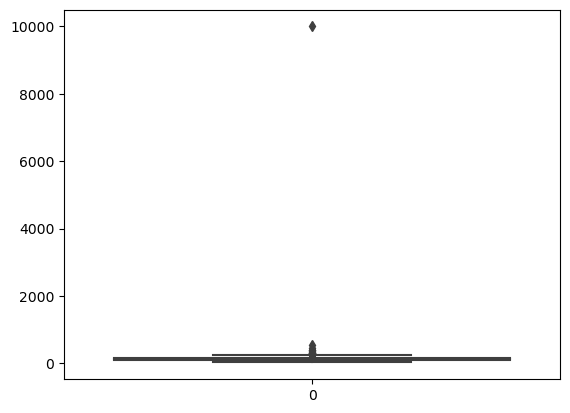

In [61]:
import seaborn as sns
sns.boxplot(df["LoanAmount"])

In [62]:
temp_LA=df["LoanAmount"]

In [63]:
np.sort(temp_LA)

array([  28.        ,   28.        ,   30.        ,   35.        ,
         40.        ,   40.        ,   40.        ,   46.        ,
         48.        ,   49.        ,   50.        ,   50.        ,
         55.        ,   57.        ,   59.        ,   60.        ,
         61.        ,   64.        ,   64.        ,   65.        ,
         65.        ,   65.        ,   66.        ,   67.        ,
         68.        ,   70.        ,   70.        ,   70.        ,
         70.        ,   71.        ,   74.        ,   75.        ,
         75.        ,   77.        ,   78.        ,   78.        ,
         79.        ,   80.        ,   80.        ,   80.        ,
         80.        ,   80.        ,   80.        ,   81.        ,
         81.        ,   83.        ,   83.        ,   84.        ,
         84.        ,   84.        ,   85.        ,   87.        ,
         88.        ,   88.        ,   88.        ,   90.        ,
         90.        ,   90.        ,   90.        ,   90.     

In [64]:
Q1=np.percentile(temp_LA,25,interpolation = "midpoint")
Q2=np.percentile(temp_LA,50,interpolation = "midpoint")
Q3=np.percentile(temp_LA,75,interpolation = "midpoint")
IQR = Q3-Q1

C:\Users\023663\AppData\Local\Temp\ipykernel_2060\43300389.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(temp_LA,25,interpolation = "midpoint")
C:\Users\023663\AppData\Local\Temp\ipykernel_2060\43300389.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(temp_LA,50,interpolation = "midpoint")
C:\Users\023663\AppData\Local\Temp\ipykernel_2060\43300389.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint

In [65]:
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
low_lim

17.25

In [66]:
up_lim

243.25

In [67]:
outlier= []
for i in temp_LA:
    if i > up_lim or i<low_lim:
        outlier.append(i)
print(outlier)

[280.0, 300.0, 290.0, 275.0, 360.0, 257.0, 390.0, 256.0, 300.0, 550.0, 260.0, 336.0, 412.0, 9999.0, 460.0, 297.0, 300.0, 260.0, 254.0]


In [68]:
df["LoanAmount"].replace(outlier,df["LoanAmount"].mean(),inplace=True)

<Axes: >

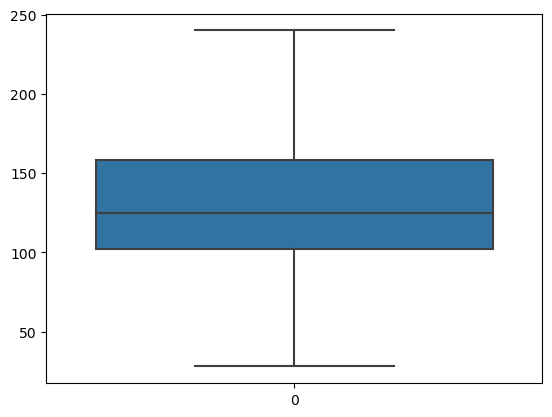

In [69]:
import seaborn as sns
sns.boxplot(df["LoanAmount"])

In [70]:
df["Credit_History"].unique()

array(['1', '55', ' '], dtype=object)

In [71]:
df["Credit_History"].replace(" ",pd.NA,inplace = True)

In [72]:
df["Credit_History"].value_counts()

Credit_History
1     365
55      1
Name: count, dtype: int64

In [82]:
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace = True)
df["Credit_History"].replace("55","1",inplace = True)

In [83]:
df["Credit_History"].value_counts()

Credit_History
1    367
Name: count, dtype: int64

<Axes: >

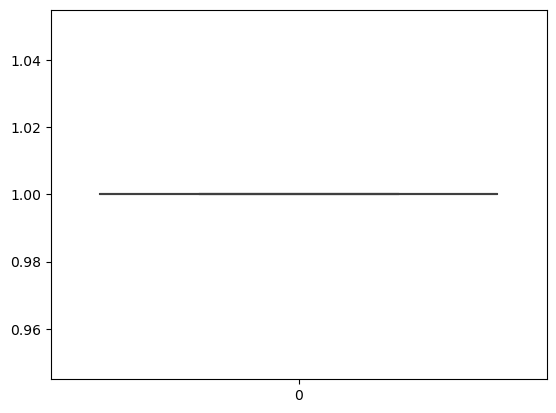

In [84]:
import seaborn as sns
sns.boxplot(df["Credit_History"])

In [85]:
df.select_dtypes(include=[np.number]).corr()

,Coapplicant_Income,LoanAmount,Loan_Amount_Term
Coapplicant_Income,1.000000,0.143944,-0.008633
LoanAmount,0.143944,1.000000,0.141159
Loan_Amount_Term,-0.008633,0.141159,1.000000
